# Linear Regression

To get our feet wet, we'll start off by looking at the problem of regression.
This is the task of predicting a *real valued target* $y$ given a data point $x$.
Regression problems are extremely common in practice. For example, they are used for predicting continuous values, such as house prices, temperatures, sales, and so on. This is quite different from classification problems (which we study later), where the outputs are discrete (such as apple, banana, orange, etc. in image classification).

## Basic Elements of Linear Regression

In linear regression, the simplest and still perhaps the most useful approach,
we assume that prediction can be expressed as a *linear* combination of the input features
(thus giving the name *linear* regression).

### Linear Model

For the sake of simplicity we will use the problem of estimating the price of a house (e.g. in dollars) based on area (e.g. in square feet) and age (e.g. in years) as our running example. In this case we could model

$$\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b$$

While this is quite illustrative, it becomes extremely tedious when dealing with more than two variables (even just naming them becomes a pain). This is what mathematicians have invented vectors for. In the case of $d$ variables we get

$$\hat{y} = w_1 \cdot x_1 + ... + w_d \cdot x_d + b$$

Given a collection of data points $X$, and corresponding target values $\mathbf{y}$,
we'll try to find the *weight* vector $w$ and bias term $b$
(also called an *offset* or *intercept*)
that approximately associate data points $x_i$ with their corresponding labels $y_i$.
Using slightly more advanced math notation, we can express the long sum as $\hat{y} = \mathbf{w}^\top \mathbf{x} + b$. Finally, for a collection of data points $\mathbf{X}$ the predictions $\hat{\mathbf{y}}$ can be expressed via the matrix-vector product:

$${\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b$$

It's quite reasonable to assume that the relationship between $x$ and $y$ is only approximately linear. There might be some error in measuring things. Likewise, while the price of a house typically decreases, this is probably less the case with very old historical mansions which are likely to be prized specifically for their age. To find the parameters $w$ we need two more things: some way to measure the quality of the current model and secondly, some way to manipulate the model to improve its quality.

### Training Data

The first thing that we need is data, such as the actual selling price of multiple houses as well as their corresponding area and age. We hope to find model parameters on this data to minimize the error between the predicted price and the real price of the model. In the terminology of machine learning, the data set is called a ‘training data’ or ‘training set’, a house (often a house and its price) is called a ‘sample’, and its actual selling price is called a ‘label’. The two factors used to predict the label are called ‘features’ or 'covariates'. Features are used to describe the characteristics of the sample.

Typically we denote by $n$ the number of samples that we collect. Each sample (indexed as $i$) is described by $x^{(i)} = [x_1^{(i)}, x_2^{(i)}]$, and the label is $y^{(i)}$.

### Loss Function

In model training, we need to measure the error between the predicted value and the real value of the price. Usually, we will choose a non-negative number as the error. The smaller the value, the smaller the error. A common choice is the square function. The expression for evaluating the error of a sample with an index of $i$ is as follows:

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2,$$

The constant $1/2$ ensures that the constant coefficient, after deriving the quadratic term, is 1, which is slightly simpler in form. Obviously, the smaller the error, the closer the predicted price is to the actual price, and when the two are equal, the error will be zero. Given the training data set, this error is only related to the model parameters, so we record it as a function with the model parameters as parameters. In machine learning, we call the function that measures the error the ‘loss function’. The squared error function used here is also referred to as ‘square loss’.

To make things a bit more concrete, consider the example below where we plot a regression problem for a one-dimensional case, e.g. for a model where house prices depend only on area.

![Linear regression is a single-layer neural network. ](../img/linearregression.svg)

As you can see, large differences between estimates $\hat{y}^{(i)}$ and observations $y^{(i)}$ lead to even larger contributions in terms of the loss, due to the quadratic dependence. To measure the quality of a model on the entire dataset, we can simply average the losses on the training set.

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

In model training, we want to find a set of model parameters, represented by $\mathbf{w}^*, b^*$, that can minimize the average loss of training samples:

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$


### Optimization Algorithm

When the model and loss function are in a relatively simple format, the solution to the aforementioned loss minimization problem can be expressed analytically in a closed form solution, involving matrix inversion. This is very elegant, it allows for a lot of nice mathematical analysis, *but* it is also very restrictive insofar as this approach only works for a small number of cases (e.g. multilayer perceptrons and nonlinear layers are no go). Most deep learning models do not possess such analytical solutions. The value of the loss function can only be reduced by a finite update of model parameters via an incremental optimization algorithm.

The mini-batch stochastic gradient descent is widely used for deep learning to find numerical solutions. Its algorithm is simple: first, we initialize the values of the model parameters, typically at random; then we iterate over the data multiple times, so that each iteration may reduce the value of the loss function. In each iteration, we first randomly and uniformly sample a mini-batch $\mathcal{B}$ consisting of a fixed number of training data examples; we then compute the derivative (gradient) of the average loss on the mini batch with regard to the model parameters. Finally, the product of this result and a predetermined step size $\eta > 0$ is used to change the parameters in the direction of the minimum of the loss. In math we have ($\partial$ denotes the partial derivative):

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b)$$

For quadratic losses and linear functions we can write this out explicitly as follows. Note that $\mathbf{w}$ and $\mathbf{x}$ are vectors. Here the more elegant vector notation makes the math much more readable than expressing things in terms of coefficients, say $w_1, w_2, \ldots w_d$.

$$
\begin{aligned}
\mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) && =
w - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\
b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  && =
b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}
$$

In the above equation $|\mathcal{B}|$ represents the number of samples (batch size) in each mini-batch, $\eta$ is referred to as ‘learning rate’ and takes a positive number. It should be emphasized that the values of the batch size and learning rate are set somewhat manually and are typically not learned through model training. Therefore, they are referred to as *hyper-parameters*. What we usually call *tuning hyper-parameters* refers to the adjustment of these terms. In the worst case this is performed through repeated trial and error until the appropriate hyper-parameters are found. A better approach is to learn these as parts of model training. This is an advanced topic and we do not cover them here for the sake of simplicity.

### Model Prediction

After model training has been completed, we then record the values of the model parameters $\mathbf{w}, b$ as $\hat{\mathbf{w}}, \hat{b}$. Note that we do not necessarily obtain the optimal solution of the loss function minimizer, $\mathbf{w}^*, b^*$ (or the true parameters), but instead we gain an approximation of the optimal solution. We can then use the learned linear regression model $\hat{\mathbf{w}}^\top x + \hat{b}$ to estimate the price of any house outside the training data set with area (square feet) as $x_1$ and house age (year) as $x_2$. Here, estimation also referred to as ‘model prediction’ or ‘model inference’.

Note that calling this step 'inference' is actually quite a misnomer, albeit one that has become the default in deep learning. In statistics 'inference' means estimating parameters and outcomes based on other data. This misuse of terminology in deep learning can be a source of confusion when talking to statisticians. We adopt the incorrect, but by now common, terminology of using 'inference' when a (trained) model is applied to new data (and express our sincere apologies to centuries of statisticians).


## From Linear Regression to Deep Networks

So far we only talked about linear functions. Neural Networks cover a lot more than that. That said, linear functions are an important building block. Let's start by rewriting things in a 'layer' notation.

### Neural Network Diagram

While in deep learning, we can represent model structures visually using neural network diagrams. To more clearly demonstrate the linear regression as the structure of neural network, Figure 3.1 uses a neural network diagram to represent the linear regression model presented in this section. The neural network diagram hides the weight and bias of the model parameter.

![Linear regression is a single-layer neural network. ](../img/singleneuron.svg)

In the neural network shown above, the inputs are $x_1, x_2, \ldots x_d$. Sometimes the number of inputs is also referred to as feature dimension. In the above cases the number of inputs is $d$ and the number of outputs is $1$. It should be noted that we use the output directly as the output of linear regression.  Since the input layer does not involve any other nonlinearities or any further calculations, the number of layers is 1. Sometimes this setting is also referred to as a single neuron. Since all inputs are connected to all outputs (in this case it's just one), the layer is also referred to as a 'fully connected layer' or 'dense layer'.

### A Detour to Biology

Neural networks quite clearly derive their name from Neuroscience. To understand a bit better how many network architectures were invented, it is worth while considering the basic structure of a neuron. For the purpose of the analogy it is sufficient to consider the *dendrites* (input terminals), the *nucleus* (CPU), the *axon* (output wire), and the *axon terminals* (output terminals) which connect to other neurons via *synapses*.

![The real neuron](../img/Neuron.svg)

Information $x_i$ arriving from other neurons (or environmental sensors such as the retina) is received in the dendrites. In particular, that information is weighted by *synaptic weights* $w_i$ which determine how to respond to the inputs (e.g. activation or inhibition via $x_i w_i$). All this is aggregated in the nucleus $y = \sum_i x_i w_i + b$, and this information is then sent for further processing in the axon $y$, typically after some nonlinear processing via $\sigma(y)$. From there it either reaches its destination (e.g. a muscle) or is fed into another neuron via its dendrites.

Brain *structures* can be quite varied. Some look rather arbitrary whereas others have a very regular structure. E.g. the visual system of many insects is quite regular. The analysis of such structures has often inspired neuroscientists to propose new architectures, and in some cases, this has been successful. Note, though, that it would be a fallacy to require a direct correspondence - just like airplanes are *inspired* by birds, they have many distinctions. Equal sources of inspiration were mathematics and computer science.

### Vectorization for Speed

In model training or prediction, we often use vector calculations and process multiple observations at the same time. To illustrate why this matters, consider two methods of adding vectors. We begin by creating two 1000 dimensional ones first.

In [1]:
from mxnet import nd
from time import time

a = nd.ones(shape=10000)
b = nd.ones(shape=10000)

One way to add vectors is to add them one coordinate at a time using a for loop.

In [2]:
start = time()
c = nd.zeros(shape=10000)
for i in range(10000):
    c[i] = a[i] + b[i]
time() - start

1.8922126293182373

Another way to add vectors is to add the vectors directly:

In [3]:
start = time()
d = a + b
time() - start

0.0002818107604980469

Obviously, the latter is vastly faster than the former. Vectorizing code is a good way of getting order of magnitude speedups. Likewise, as we saw above, it also greatly simplifies the mathematics and with it, it reduces the potential for errors in the notation.

## The Normal Distribution and Squared Loss

The following is optional and can be skipped but it will greatly help with understanding some of the design choices in building deep learning models. As we saw above, using the squared loss $l(y, \hat{y}) = \frac{1}{2} (y - \hat{y})^2$ has many nice properties, such as having a particularly simple derivative $\partial_{\hat{y}} l(y, \hat{y}) = (\hat{y} - y)$. That is, the gradient is given by the difference between estimate and observation. You might reasonably point out that linear regression is a [classical](https://en.wikipedia.org/wiki/Regression_analysis#History) statistical model. Legendre first developed the method of least squares regression in 1805, which was shortly thereafter rediscovered by Gauss in 1809. To understand this a bit better, recall the normal distribution with mean $\mu$ and variance $\sigma^2$.

$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right)$$

It can be visualized as follows:

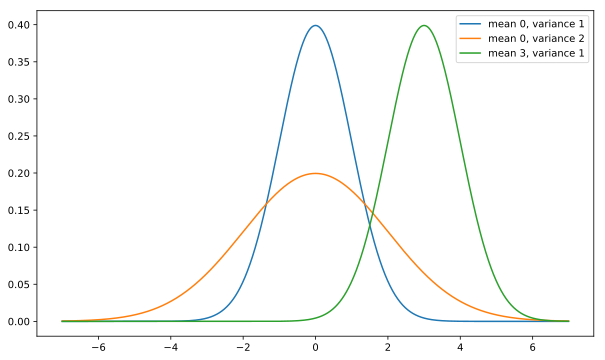

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
from mxnet import nd
import math

x = nd.arange(-7, 7, 0.01)
# Mean and variance pairs
parameters = [(0,1), (0,2), (3,1)]

# Display SVG rather than JPG
display.set_matplotlib_formats('svg')
plt.figure(figsize=(10, 6))
for (mu, sigma) in parameters:
    p = (1/math.sqrt(2 * math.pi * sigma**2)) * nd.exp(-(0.5/sigma**2) * (x-mu)**2)
    plt.plot(x.asnumpy(), p.asnumpy(), label='mean ' + str(mu) + ', variance ' + str(sigma))

plt.legend()
plt.show()

As can be seen in the figure above, changing the mean shifts the function, increasing the variance makes it more spread-out with a lower peak. The key assumption in linear regression with least mean squares loss is that the observations actually arise from noisy observations, where noise is added to the data, e.g. as part of the observations process.

$$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon \text{ where } \epsilon \sim \mathcal{N}(0, \sigma^2)$$

This allows us to write out the *likelihood* of seeing a particular $y$ for a given $\mathbf{x}$ via

$$p(y|\mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right)$$

A good way of finding the most likely values of $b$ and $\mathbf{w}$ is to maximize the *likelihood* of the entire dataset

$$p(Y|X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)})$$

The notion of maximizing the likelihood of the data subject to the parameters is well known as the *Maximum Likelihood Principle* and its estimators are usually called *Maximum Likelihood Estimators* (MLE). Unfortunately, maximizing the product of many exponential functions is pretty awkward, both in terms of implementation and in terms of writing it out on paper. Instead, a much better way is to minimize the *Negative Log-Likelihood* $-\log P(Y|X)$. In the above case this works out to be

$$-\log P(Y|X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2$$

A closer inspection reveals that for the purpose of minimizing $-\log P(Y|X)$ we can skip the first term since it doesn't depend on $\mathbf{w}, b$ or even the data. The second term is identical to the objective we initially introduced, but for the multiplicative constant $\frac{1}{\sigma^2}$. Again, this can be skipped if we just want to get the most likely solution. It follows that maximum likelihood in a linear model with additive Gaussian noise is equivalent to linear regression with squared loss.

## Summary

* Key ingredients in a machine learning model are training data, a loss function, an optimization algorithm, and quite obviously, the model itself.
* Vectorizing makes everything better (mostly math) and faster (mostly code).
* Minimizing an objective function and performing maximum likelihood can mean the same thing.
* Linear models are neural networks, too.

## Exercises

1. Assume that we have some data $x_1, \ldots x_n \in \mathbb{R}$. Our goal is to find a constant $b$ such that $\sum_i (x_i - b)^2$ is minimized.
    * Find the optimal closed form solution.
    * What does this mean in terms of the Normal distribution?
1. Assume that we want to solve the optimization problem for linear regression with quadratic loss explicitly in closed form. To keep things simple, you can omit the bias $b$ from the problem.
    * Rewrite the problem in matrix and vector notation (hint - treat all the data as a single matrix).
    * Compute the gradient of the optimization problem with respect to $w$.
    * Find the closed form solution by solving a matrix equation.
    * When might this be better than using stochastic gradient descent (i.e. the incremental optimization approach that we discussed above)? When will this break (hint - what happens for high-dimensional $x$, what if many observations are very similar)?.
1. Assume that the noise model governing the additive noise $\epsilon$ is the exponential distribution. That is, $p(\epsilon) = \frac{1}{2} \exp(-|\epsilon|)$.
    * Write out the negative log-likelihood of the data under the model $-\log p(Y|X)$.
    * Can you find a closed form solution?
    * Suggest a stochastic gradient descent algorithm to solve this problem. What could possibly go wrong (hint - what happens near the stationary point as we keep on updating the parameters). Can you fix this?
1. Compare the runtime of the two methods of adding two vectors using other packages (such as NumPy) or other programming languages (such as MATLAB).

## Scan the QR Code to [Discuss](https://discuss.mxnet.io/t/2331)

![](../img/qr_linear-regression.svg)